# **S&P 500 Stock Prices**: Case Study

**About**

Historical stock market data for current S&P 500 companies, from 2014-2017. Each record represents a single day of trading, and includes the ticker name, volume, high, low, open and close prices.

**Recommended Analysis**

1. Which date in the sample saw the largest overall trading volume? On that date, which two stocks were traded most?

2. On which day of the week does volume tend to be highest? Lowest?

3. On which date did Amazon (AMZN) see the most volatility, measured by the difference between the high and low price?

4. If you could go back in time and invest in one stock from 1/2/2014 - 12/29/2017, which would you choose? What % gain would you realize?

**Want feedback on your solutions?**

-> Share visualizations (and any applicable pivot tables, code, etc) on LinkedIn and mention @Maven Analytics. We would love to see your work and give our thoughts!

---

## **About S&P 500**
The S&P 500 is like a snapshot of the US economy. It tracks the stock prices of 500 of the largest American companies, giving us a good idea of how the overall stock market is doing. [1] It's important because it's used as a benchmark for investments and reflects the health of the economy. [2]

## **The Purpose**
I was hired on Fivver to help an entrepreneur understand which data in the sample saw the largest overall trading volume and which two stocks were traded the most due to the entrepreneur's time constraint.

The goal: Identify the date with the highest overall trading volume and the two most traded stocks on that date.

## **The Team**
* Data Analyst
* Entrepreneur (Stakeholder)

## **The Data**
The stock market data for companies that are currently in the S&P 500 composition changes. The dataset S&P 500 Stock Prices 2014-2017.csv, [3] contains a record that represents a single day of trading and includes the ticker name, volume, high, low, open, and close prices.

In this dataset, there are 497472 rows, 7 columns, and these variables.
* *Disclaimer: I used Gemini to explain each variable description*

Variable | Description |
---| ---|
symbol| ticker name: stock symbol
date| date of trading day
open| price of the stock at the beginning of the trading day
high| the highest price the stock reached during the trading day
low| the lowest price the stock reached during the trading day
close| The price of the stock at the end of the trading day (Most important price of the day)
volume| The total number of shares traded during that day. (High volume generally indicates more interest and activity in the stock.)

**Open-Source**
* [1][Wikipedia](https://en.wikipedia.org/wiki/S%26P_500#:~:text=The%20Standard%20and%20Poor's%20500,largest%20companies%20listed%20on%20stock)
* [2][The (Mis)uses of the S&P 500](https://businesslawreview.uchicago.edu/print-archive/misuses-sp-500#:~:text=The%20S%26P%20500%20is%20widely,(iii)%20evaluate%20firm%20performance.)
* [3][Maven Analtyics](https://app.mavenanalytics.io/datasets?order=-fields.numberOfRecords)

In [3]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv("S&P 500 Stock Prices 2014-2017.csv")

In [22]:
df.head()

# Format is good

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [23]:
df.info()
# 497472 entries | 7 columns
# float(4) decimal numeric: open, high, low, close
# int(1) numeric: volume
# object(2) string/character: symbol and date

# I just noticed date needs to be changed datetime
# There are missing values and potential duplications in entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [24]:
# Cleaning date to datetime

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497461 non-null  float64       
 3   high    497464 non-null  float64       
 4   low     497464 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [25]:
# Cleaning missing values

df.isnull().sum()
print("\nMissing Values:\n", df.isnull().sum())

df.duplicated().sum()
print("\nDuplications:\n", df.duplicated().sum())

# There are no duplications in the dataset


Missing Values:
 symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

Duplications:
 0


In [26]:
# Removing nulls in dataset

df= df.dropna()

# Summary of df
print("\nDataset after dropping rows w/nulls:\n", df)

# New total of rows: 497461 entries is only 5% less of the data


Dataset after dropping rows w/nulls:
        symbol       date      open      high       low     close    volume
0         AAL 2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1        AAPL 2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2         AAP 2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3        ABBV 2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4         ABC 2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391
...       ...        ...       ...       ...       ...       ...       ...
497467    XYL 2017-12-29   68.5300   68.8000   67.9200   68.2000   1046677
497468    YUM 2017-12-29   82.6400   82.7100   81.5900   81.6100   1347613
497469    ZBH 2017-12-29  121.7500  121.9500  120.6200  120.6700   1023624
497470   ZION 2017-12-29   51.2800   51.5500   50.8100   50.8300   1261916
497471    ZTS 2017-12-29   72.5500   72.7600   72.0400   72.0400   1704122

[497461 rows x 7 columns]


---

**Investigate the potential outliers on open, high, low, close, and volume. Understanding the why?**
* Why they are extreme values
* Are they errors
* Are they genuine
* Domain expertise is often essential here

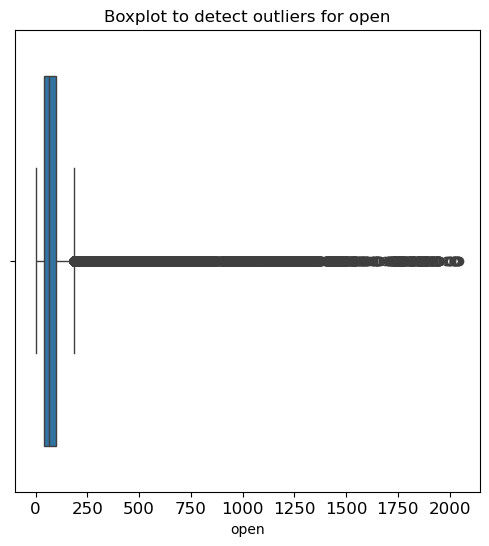

Upper Bound: 183.49
Lower Bound: -43.39
Number of outliers in 'open': 30313
Outliers:
        symbol       date    open     high     low   close   volume
12        ADS 2014-01-02  262.44  262.680  258.78  262.34   547808
34        AMG 2014-01-02  215.92  216.690  211.79  213.38   285563
37       AMZN 2014-01-02  398.80  399.360  394.02  397.97  2140246
56        AZO 2014-01-02  477.67  479.700  472.51  474.11   151840
66       BIIB 2014-01-02  279.44  282.515  276.21  280.33   902226
...       ...        ...     ...      ...     ...     ...      ...
497402    TDG 2017-12-29  276.61  279.500  274.62  274.62   251752
497408    TMO 2017-12-29  191.94  191.950  189.88  189.88   856644
497425   ULTA 2017-12-29  224.98  225.140  222.35  223.66   668078
497426    UNH 2017-12-29  223.95  223.950  220.46  220.46  2350169
497445    WAT 2017-12-29  195.52  195.660  193.16  193.19   205357

[30313 rows x 7 columns]


In [28]:
# Checking for outliers for open

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for open', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['open'])
plt.show()

# Calculate Q1,Q3 and IOR
Q1 = df['open'].quantile(0.25)
Q3= df['open'].quantile(0.75)

# Compute the interquartile range in `open`
IQR = Q3 - Q1

# Define outliers boundaries (using a multiplier of 1.5 is standard, but adjustable)
open_upper_bound = Q3 + 1.5 * IQR
open_lower_bound = Q1 - 1.5 * IQR
print("Upper Bound:", open_upper_bound)
print("Lower Bound:", open_lower_bound)

# Identify subset of data containing outliers in `open`
outliers = df[(df['open'] < open_lower_bound) | (df['open'] > open_upper_bound)]

# Count how many rows in the data contain outliers in `open`
print("Number of outliers in 'open':", len(outliers))

if not outliers.empty: # Check if outliers is empty before printing to avoid errors
    print("Outliers:\n", outliers)
else:
    print("No outliers found")

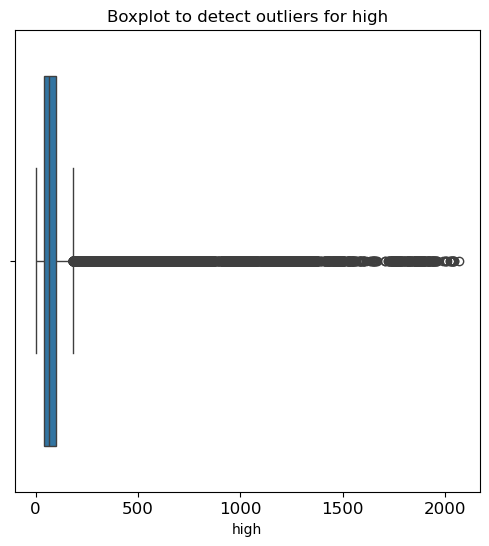

Upper Bound: 184.94
Lower Bound: -43.620000000000005
Number of outliers in 'high': 30393


In [29]:
# Checking for outliers for high

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for high', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['high'])
plt.show()

H_Q1 = df['high'].quantile(0.25)
H_Q3= df['high'].quantile(0.75)

H_IQR = H_Q3 - H_Q1

high_upper_bound = H_Q3 + 1.5 * H_IQR
high_lower_bound = H_Q1 - 1.5 * H_IQR
print("Upper Bound:", high_upper_bound)
print("Lower Bound:", high_lower_bound)

outliers = df[(df['high'] < high_lower_bound) | (df['high'] > high_upper_bound)]

print("Number of outliers in 'high':", len(outliers))

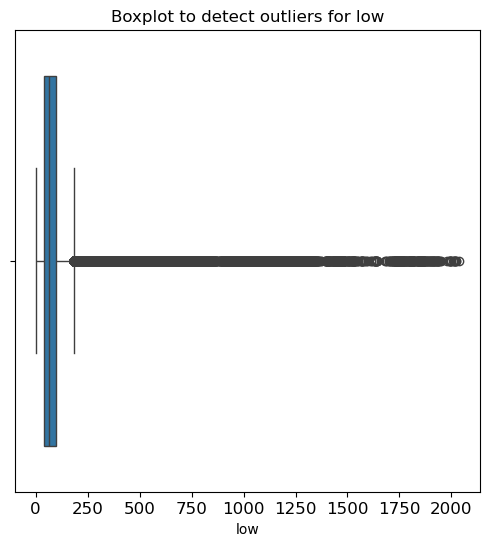

Upper Bound: 182.02999999999997
Lower Bound: -43.16999999999999
Number of outliers in 'low': 30239


In [30]:
# Checking for outliers low

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for low', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['low'])
plt.show()

Q1 = df['low'].quantile(0.25)
Q3= df['low'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

outliers = df[(df['low'] < lower_bound) | (df['low'] > upper_bound)]

print("Number of outliers in 'low':", len(outliers))

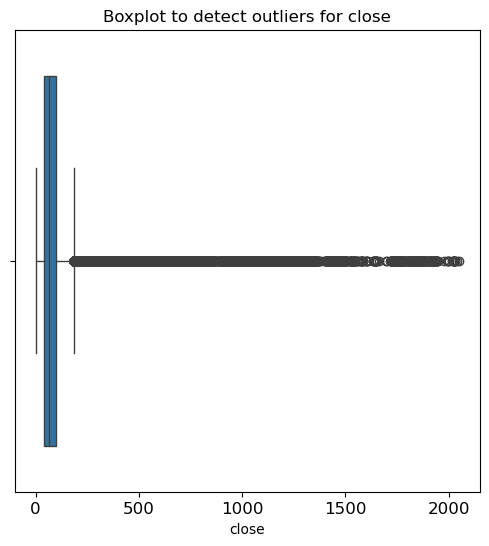

Upper Bound: 183.5
Lower Bound: -43.379999999999995
Number of outliers in 'close': 30337


In [31]:
# Checking for outliers close

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for close', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['close'])
plt.show()

Q1 = df['close'].quantile(0.25)
Q3= df['close'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

outliers = df[(df['close'] < lower_bound) | (df['close'] > upper_bound)]

print("Number of outliers in 'close':", len(outliers))

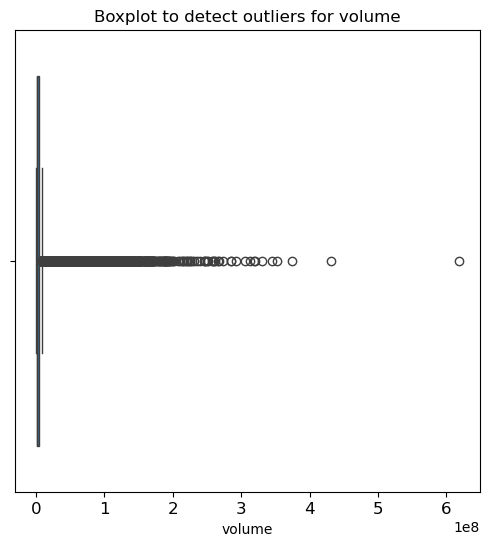

Upper Bound: 9059723.0
Lower Bound: -3707541.0
Number of outliers in 'volume': 47680


In [32]:
# Checking for outliers volume

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for volume', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['volume'])
plt.show()

Q1 = df['volume'].quantile(0.25)
Q3= df['volume'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

outliers = df[(df['volume'] < lower_bound) | (df['volume'] > upper_bound)]

print("Number of outliers in 'volume':", len(outliers))

In this observation of outliers in float variable the number of outliers is the amount of entries, potentially showing it could be genuine. 
The lower bound is relatively the same but in the left skew. A closer scope on upper bound are right skewed.

Total of outliers in each float variable:
* open outliers-30313 (of 497461 entries)
* high outliers-30239
* close outliers-30337
* volume outliers-47680

Definitions of Bounds[1]:
* Lower bound: a value that is less than or equal to every element of a set of data.
* Upper bound: a value that is greater than or equal to every element of a set of data.

[1][Math is fun](https://www.mathsisfun.com/definitions/bounds.html)

In [34]:
df.describe()

# Pandas datetime or datetime64[ns] will show up that way
# It seems there is no fluctuation between the open, high, low, and close
# However, volume show fluctuation on total shares traded during the days
# It seems 2016-2017 has the most volumes

,date,open,high,low,close,volume
count,497461,497461.000000,497461.000000,497461.000000,497461.000000,4.974610e+05
mean,2016-01-06 17:16:56.524310016,86.352275,87.132717,85.552616,86.368586,4.253695e+06
min,2014-01-02 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,2015-01-08 00:00:00,41.690000,42.090000,41.280000,41.700000,1.080183e+06
50%,2016-01-11 00:00:00,64.970000,65.560000,64.357400,64.980000,2.085013e+06
75%,2017-01-06 00:00:00,98.410000,99.230000,97.580000,98.420000,4.271999e+06
max,2017-12-29 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,101.471228,102.312340,100.571231,101.471516,8.232210e+06


Now that the data is cleaned and prepared, I will begin analyzing and process.

Reflection:
* The relationship between the float variable are geninue.
* The distributions of the data has a right skew

In [45]:
# Identify the date with the highest overall trading volume

# Calculating total trading volume for each date
daily_volume = df.groupby('date')['volume'].sum()

# Find the date with the largest overall trading volume
max_volume_date = daily_volume.idxmax()
max_volume = daily_volume.max()

# Filter the DataFrame for the date with the maximum volume
max_volume_df = df[df['date'] == max_volume_date]

# Find the top two traded stocks on that date
top_two_stocks = max_volume_df.nlargest(2, 'volume')

print(f"\nThe date with the largest overall trading volume was: {max_volume_date.strftime('%Y-%m-%d')}")
print(f"The total trading volume on that date was: {max_volume}")
print("\nThe two stocks with the highest trading volume on that date were:")
print(top_two_stocks[['symbol', 'volume']])


The date with the largest overall trading volume was: 2015-08-24
The total trading volume on that date was: 4607945196

The two stocks with the highest trading volume on that date were:
       symbol     volume
201266    BAC  214649482
201209   AAPL  162206292


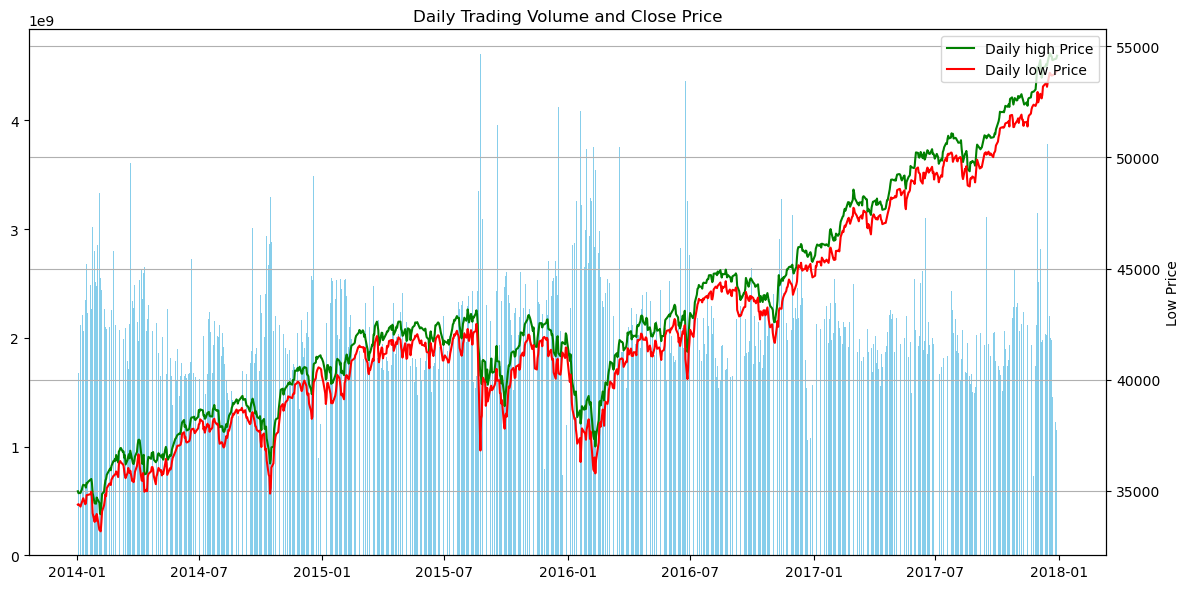

In [47]:
# Creating a bar chart to show dates of volumes of price in high and low

daily_high_price = df.groupby('date')['high'].sum()
daily_low_price = df.groupby('date')['low'].sum()

plt.figure(figsize=(12, 6))

plt.bar(daily_volume.index, daily_volume.values, label='Daily Volume', color='skyblue')

ax2 = plt.gca().twinx()  # Use gca() to get the current axes

ax2.plot(daily_high_price.index, daily_high_price.values, color='green', label='Daily high Price')
ax2.plot(daily_low_price.index, daily_low_price.values, color='red', label='Daily low Price')

plt.title('Daily Trading Volume and Close Price')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
ax2.set_ylabel('High Price')
ax2.set_ylabel('Low Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left')  # Adjust legend location as needed
ax2.legend(loc='upper right')  # Legend for the second y-axis
plt.tight_layout()
plt.show()

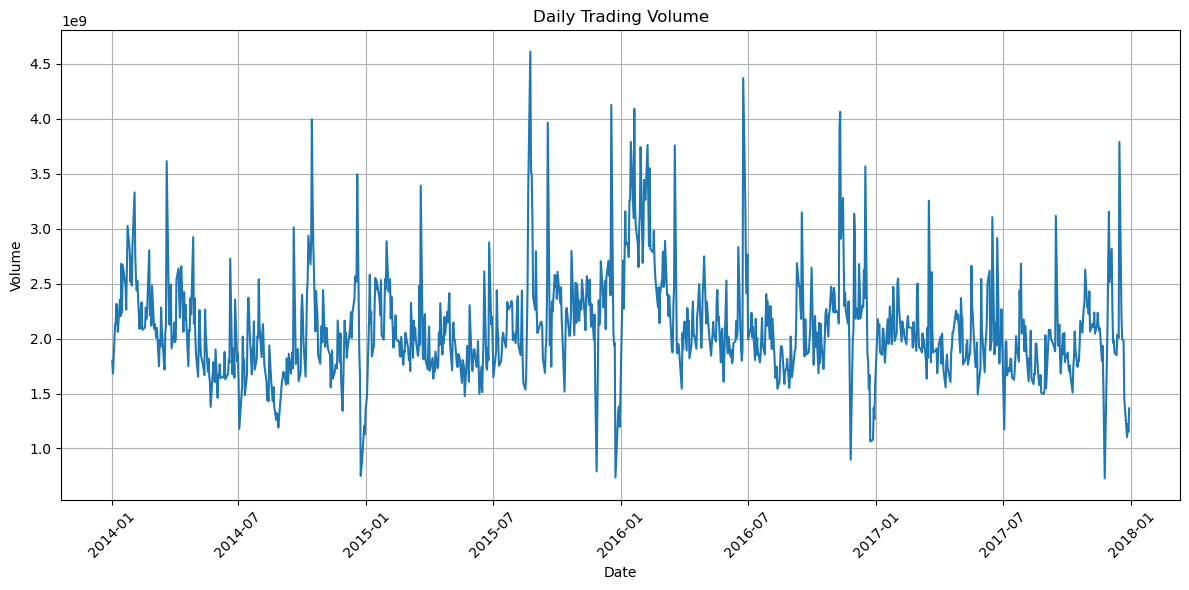

In [49]:
# Up close visual on the daily trading volume
plt.figure(figsize=(12, 6))
plt.plot(daily_low_price.index, daily_volume.values)
plt.title('Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

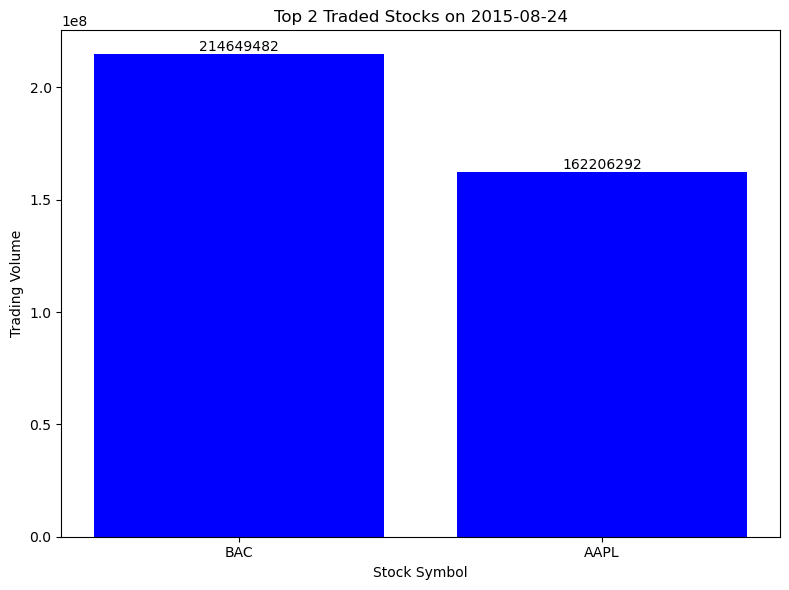

In [51]:
# Create the bar chart comparing the 2 top ticker name
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(top_two_stocks['symbol'], top_two_stocks['volume'], color='blue')

plt.title(f'Top 2 Traded Stocks on {max_volume_date.strftime("%Y-%m-%d")}')
plt.xlabel('Stock Symbol')
plt.ylabel('Trading Volume')

# Add volume labels on top of bars for better readability
for i, v in enumerate(top_two_stocks['volume']):
    plt.text(i, v, str(v), ha='center', va='bottom')  # ha and va adjust the position of the text

plt.tight_layout()
plt.show()

## **Insight**
Recap, the goal: Identify the date with the highest overall trading volume and the two most traded stocks on that date.

I have identifed the date with the highest overall trading volume at 2015-08-24. I include the maximum volume, and date to search for the top two stocks which are BAC and AAPL in the S&P 500.
I learned BAC or Bank of America and AAPL or Apple were at it's lowest of the day which created volume. 

It is good to check the US economy and other factors during the date of 2015-08-24 on why it dipped so low.
Based on my research: Bank of America (BAC) stock dipped low in August 2015 due to a large drop in equities in Asia, which triggered a drop in index futures in Europe and the U.S.[1][2] The stock closed at $46.72, falling short of the S&P 500's gain of 0.39%3.[3] Apple (APPLE), stock price was significantly lower than the highest priced reached in the past year which could me apple would most likley rise in the future. [4]

**Open-Source**
* [1][CNBC](https://www.bing.com/search?q=why%20did%20BAC%20stock%20dipped%20so%20low%20of%202015-08-24&qs=n&form=seinsb&sp=-1&lq=0&pq=why%20did%20bac%20stock%20dipped%20so%20low%20of%202015-08-24&sc=12-45&sk=&cvid=02B0BF588FEA43FC8CCA8F6F83E05195&ghsh=0&ghacc=0&ghpl=)
* [2][Yahoo](https://finance.yahoo.com/news/aug-24-2015-flash-crash-142252551.html)
* [3][Yahoo](https://finance.yahoo.com/news/bank-america-bac-stock-sinks-224518306.html)
* [4][MacRumors](https://www.macrumors.com/2015/08/24/aapl-below-100-dow-jones-downturn/)